In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2

In [2]:
df = pd.read_csv('stroke_data.csv')
df.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [3]:
df1 = df.copy(deep=True)
df1.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [5]:
df1.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
df1.dropna(axis=0,inplace=True)

In [7]:
df1.shape

(40907, 11)

<AxesSubplot: ylabel='stroke'>

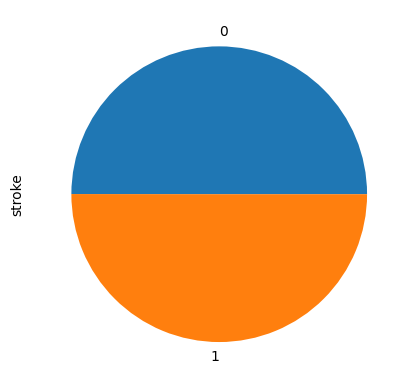

In [8]:
df1.groupby('stroke')['stroke'].count().plot(kind='pie')

In [28]:
df1.stroke.value_counts()

0    20447
1    20379
Name: stroke, dtype: int64

In [9]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>=1:
    print('The categorical variables :', categorical)

There are 0 categorical variables



In [10]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 11 numerical variables

The numerical variables : ['sex', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


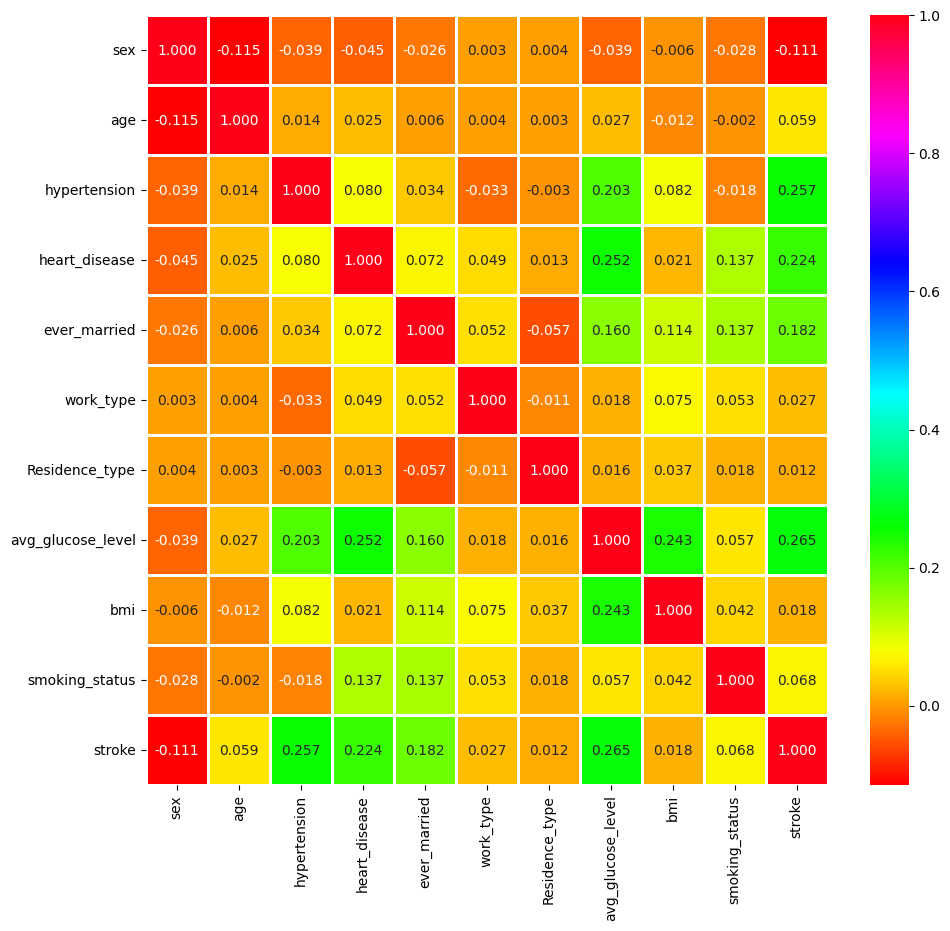

In [11]:
plt.figure(figsize=(11,10))
sns.heatmap(df1[numerical].corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

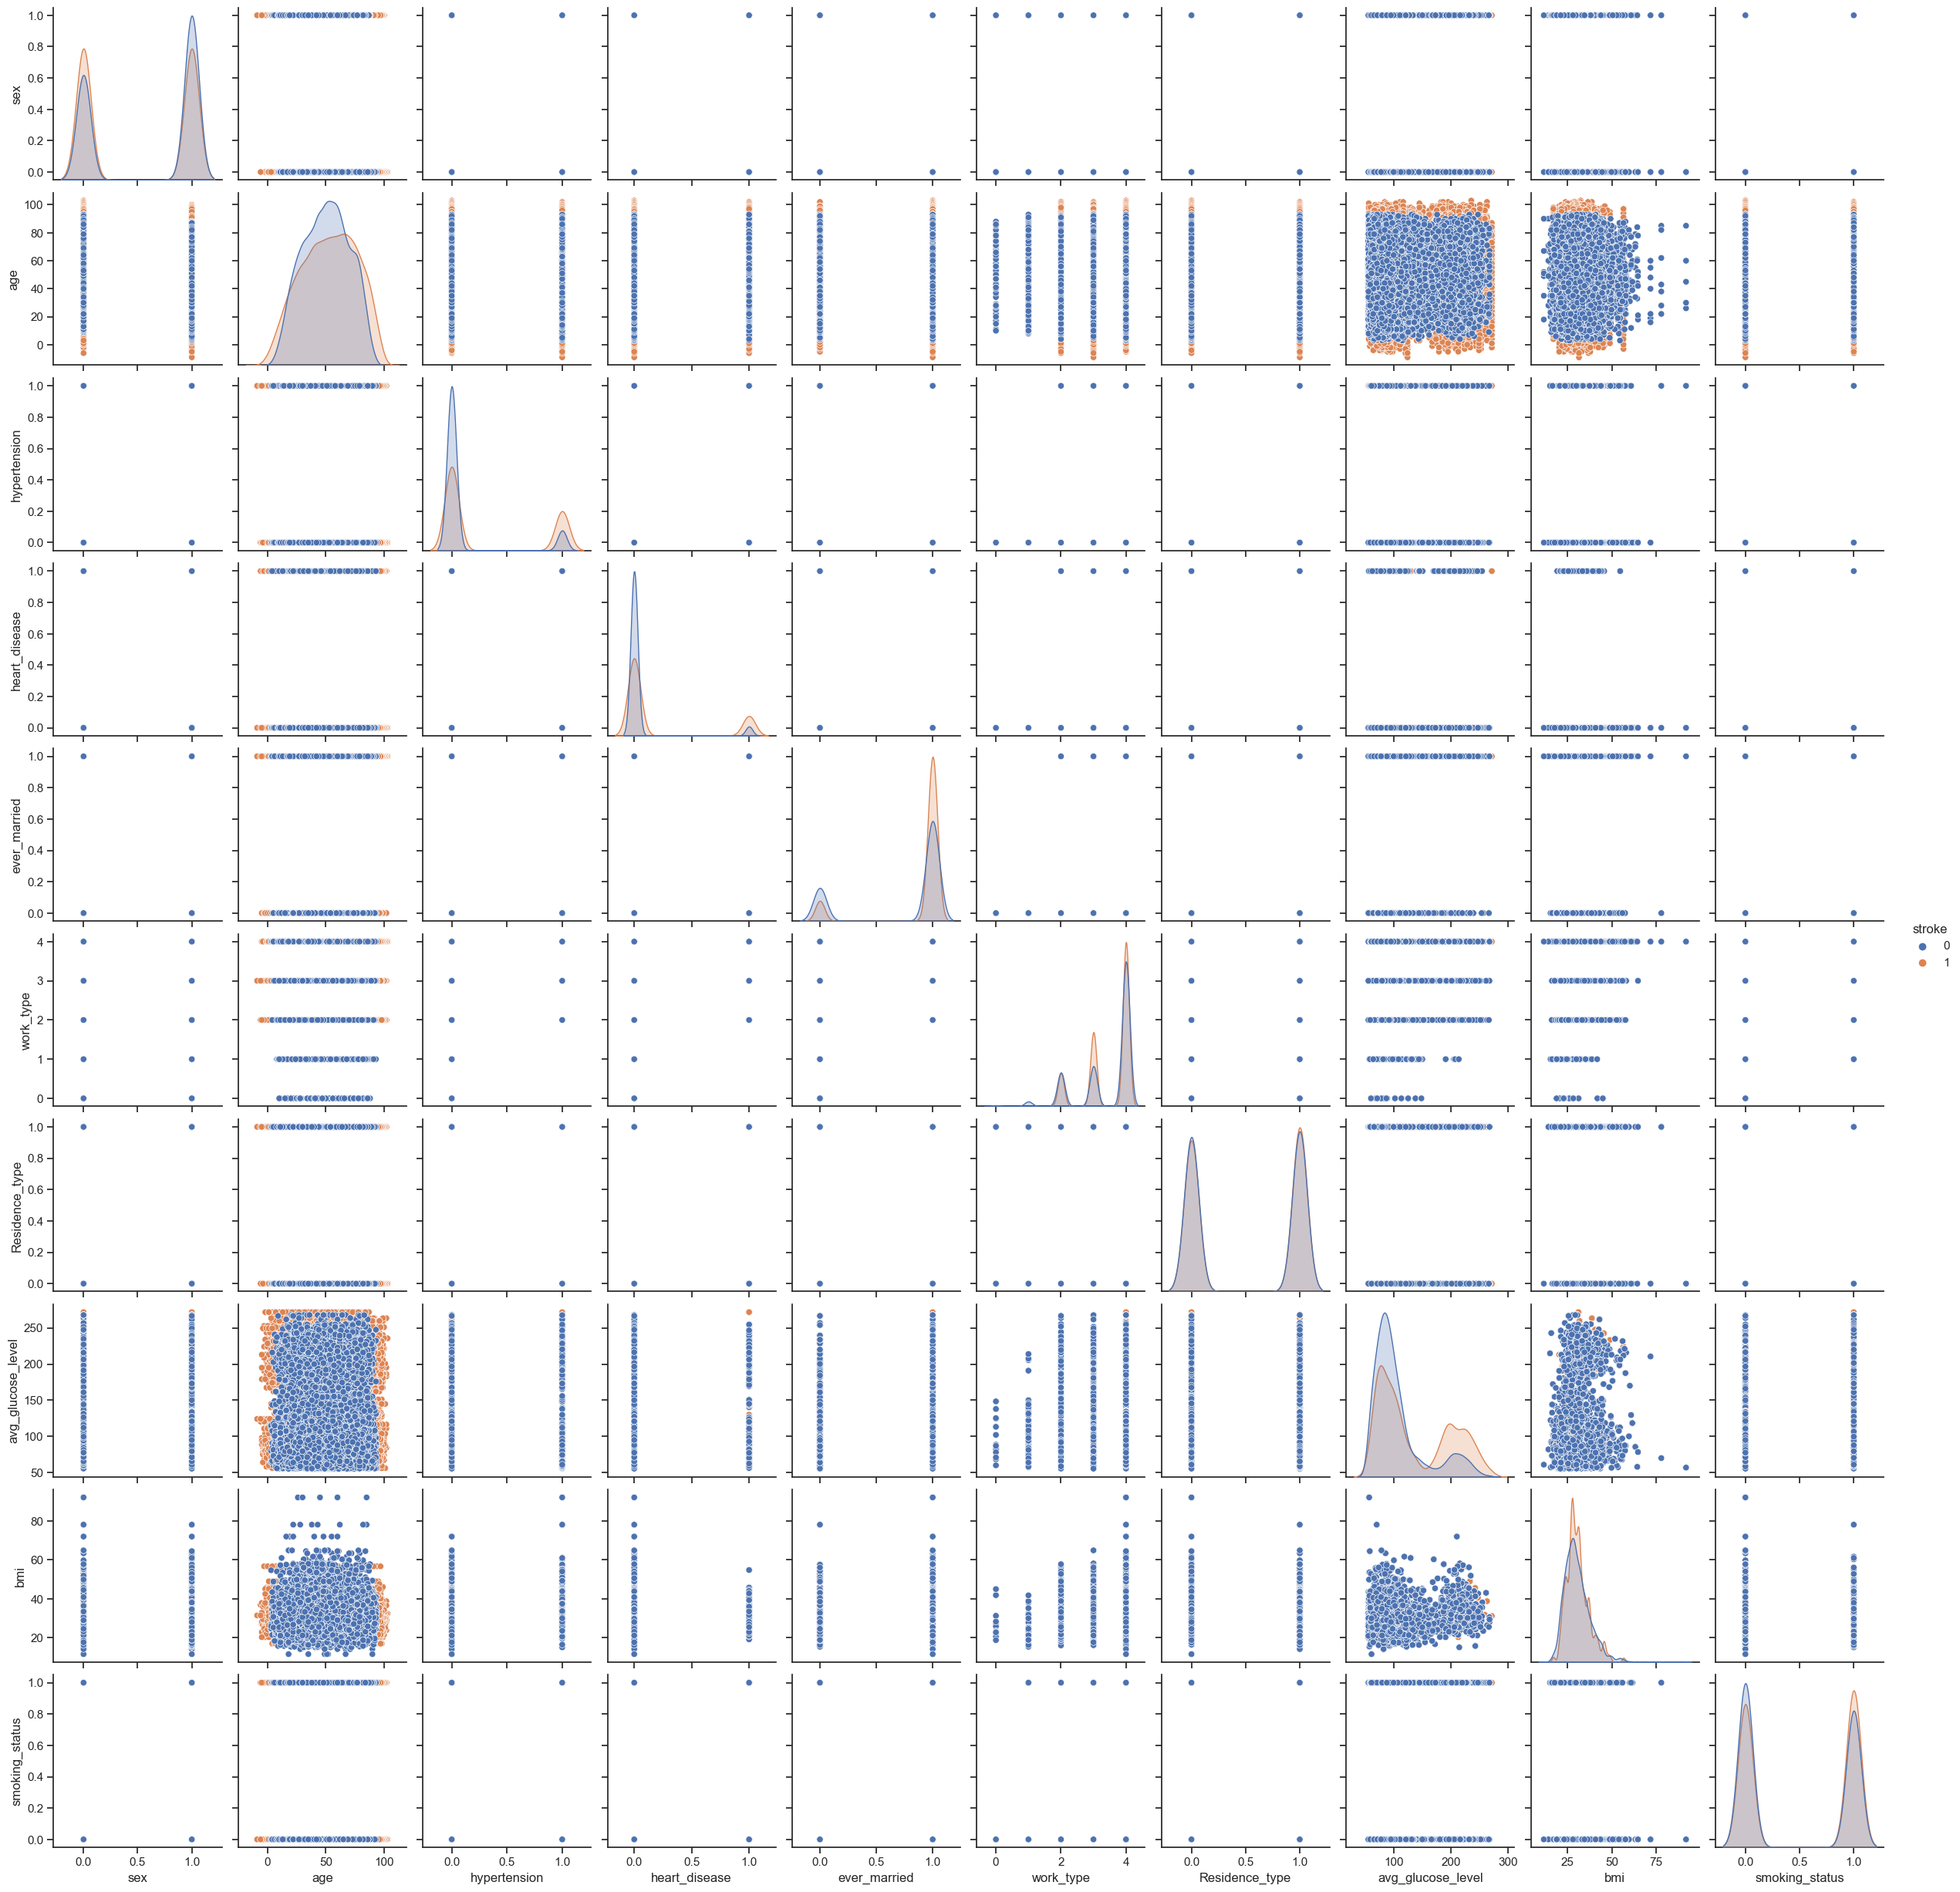

In [13]:
sns.set_theme(style="ticks")
sns.pairplot(df1, hue="stroke")

array([[<AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'hypertension'}>],
       [<AxesSubplot: title={'center': 'heart_disease'}>,
        <AxesSubplot: title={'center': 'ever_married'}>,
        <AxesSubplot: title={'center': 'work_type'}>],
       [<AxesSubplot: title={'center': 'Residence_type'}>,
        <AxesSubplot: title={'center': 'avg_glucose_level'}>,
        <AxesSubplot: title={'center': 'bmi'}>],
       [<AxesSubplot: title={'center': 'smoking_status'}>,
        <AxesSubplot: title={'center': 'stroke'}>, <AxesSubplot: >]],
      dtype=object)

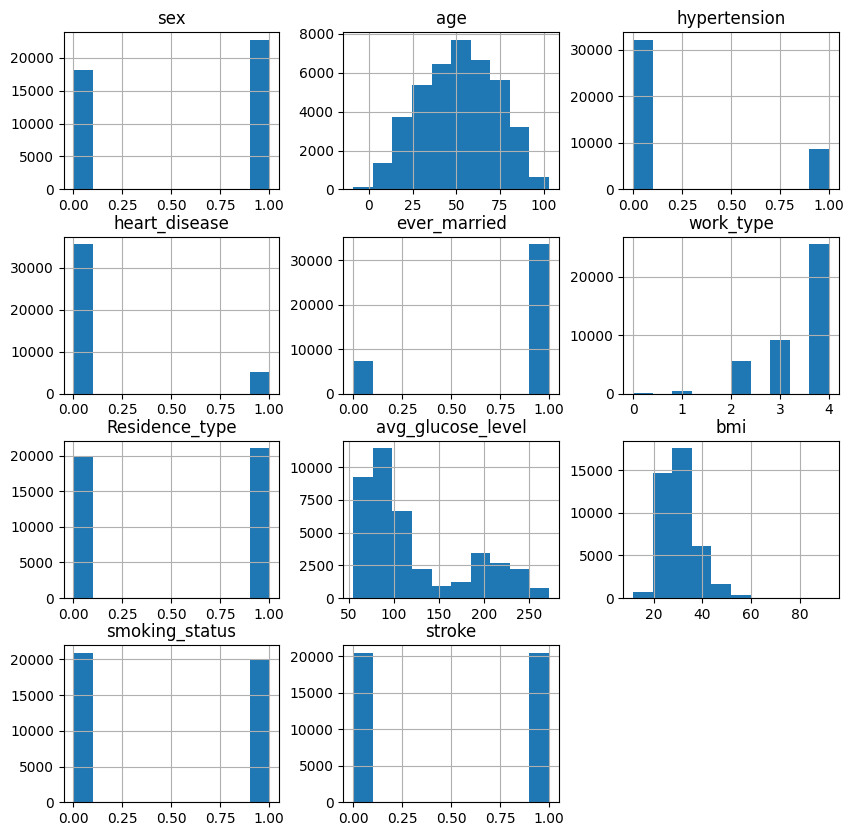

In [12]:
df1.hist(figsize=(10,10))

<AxesSubplot: >

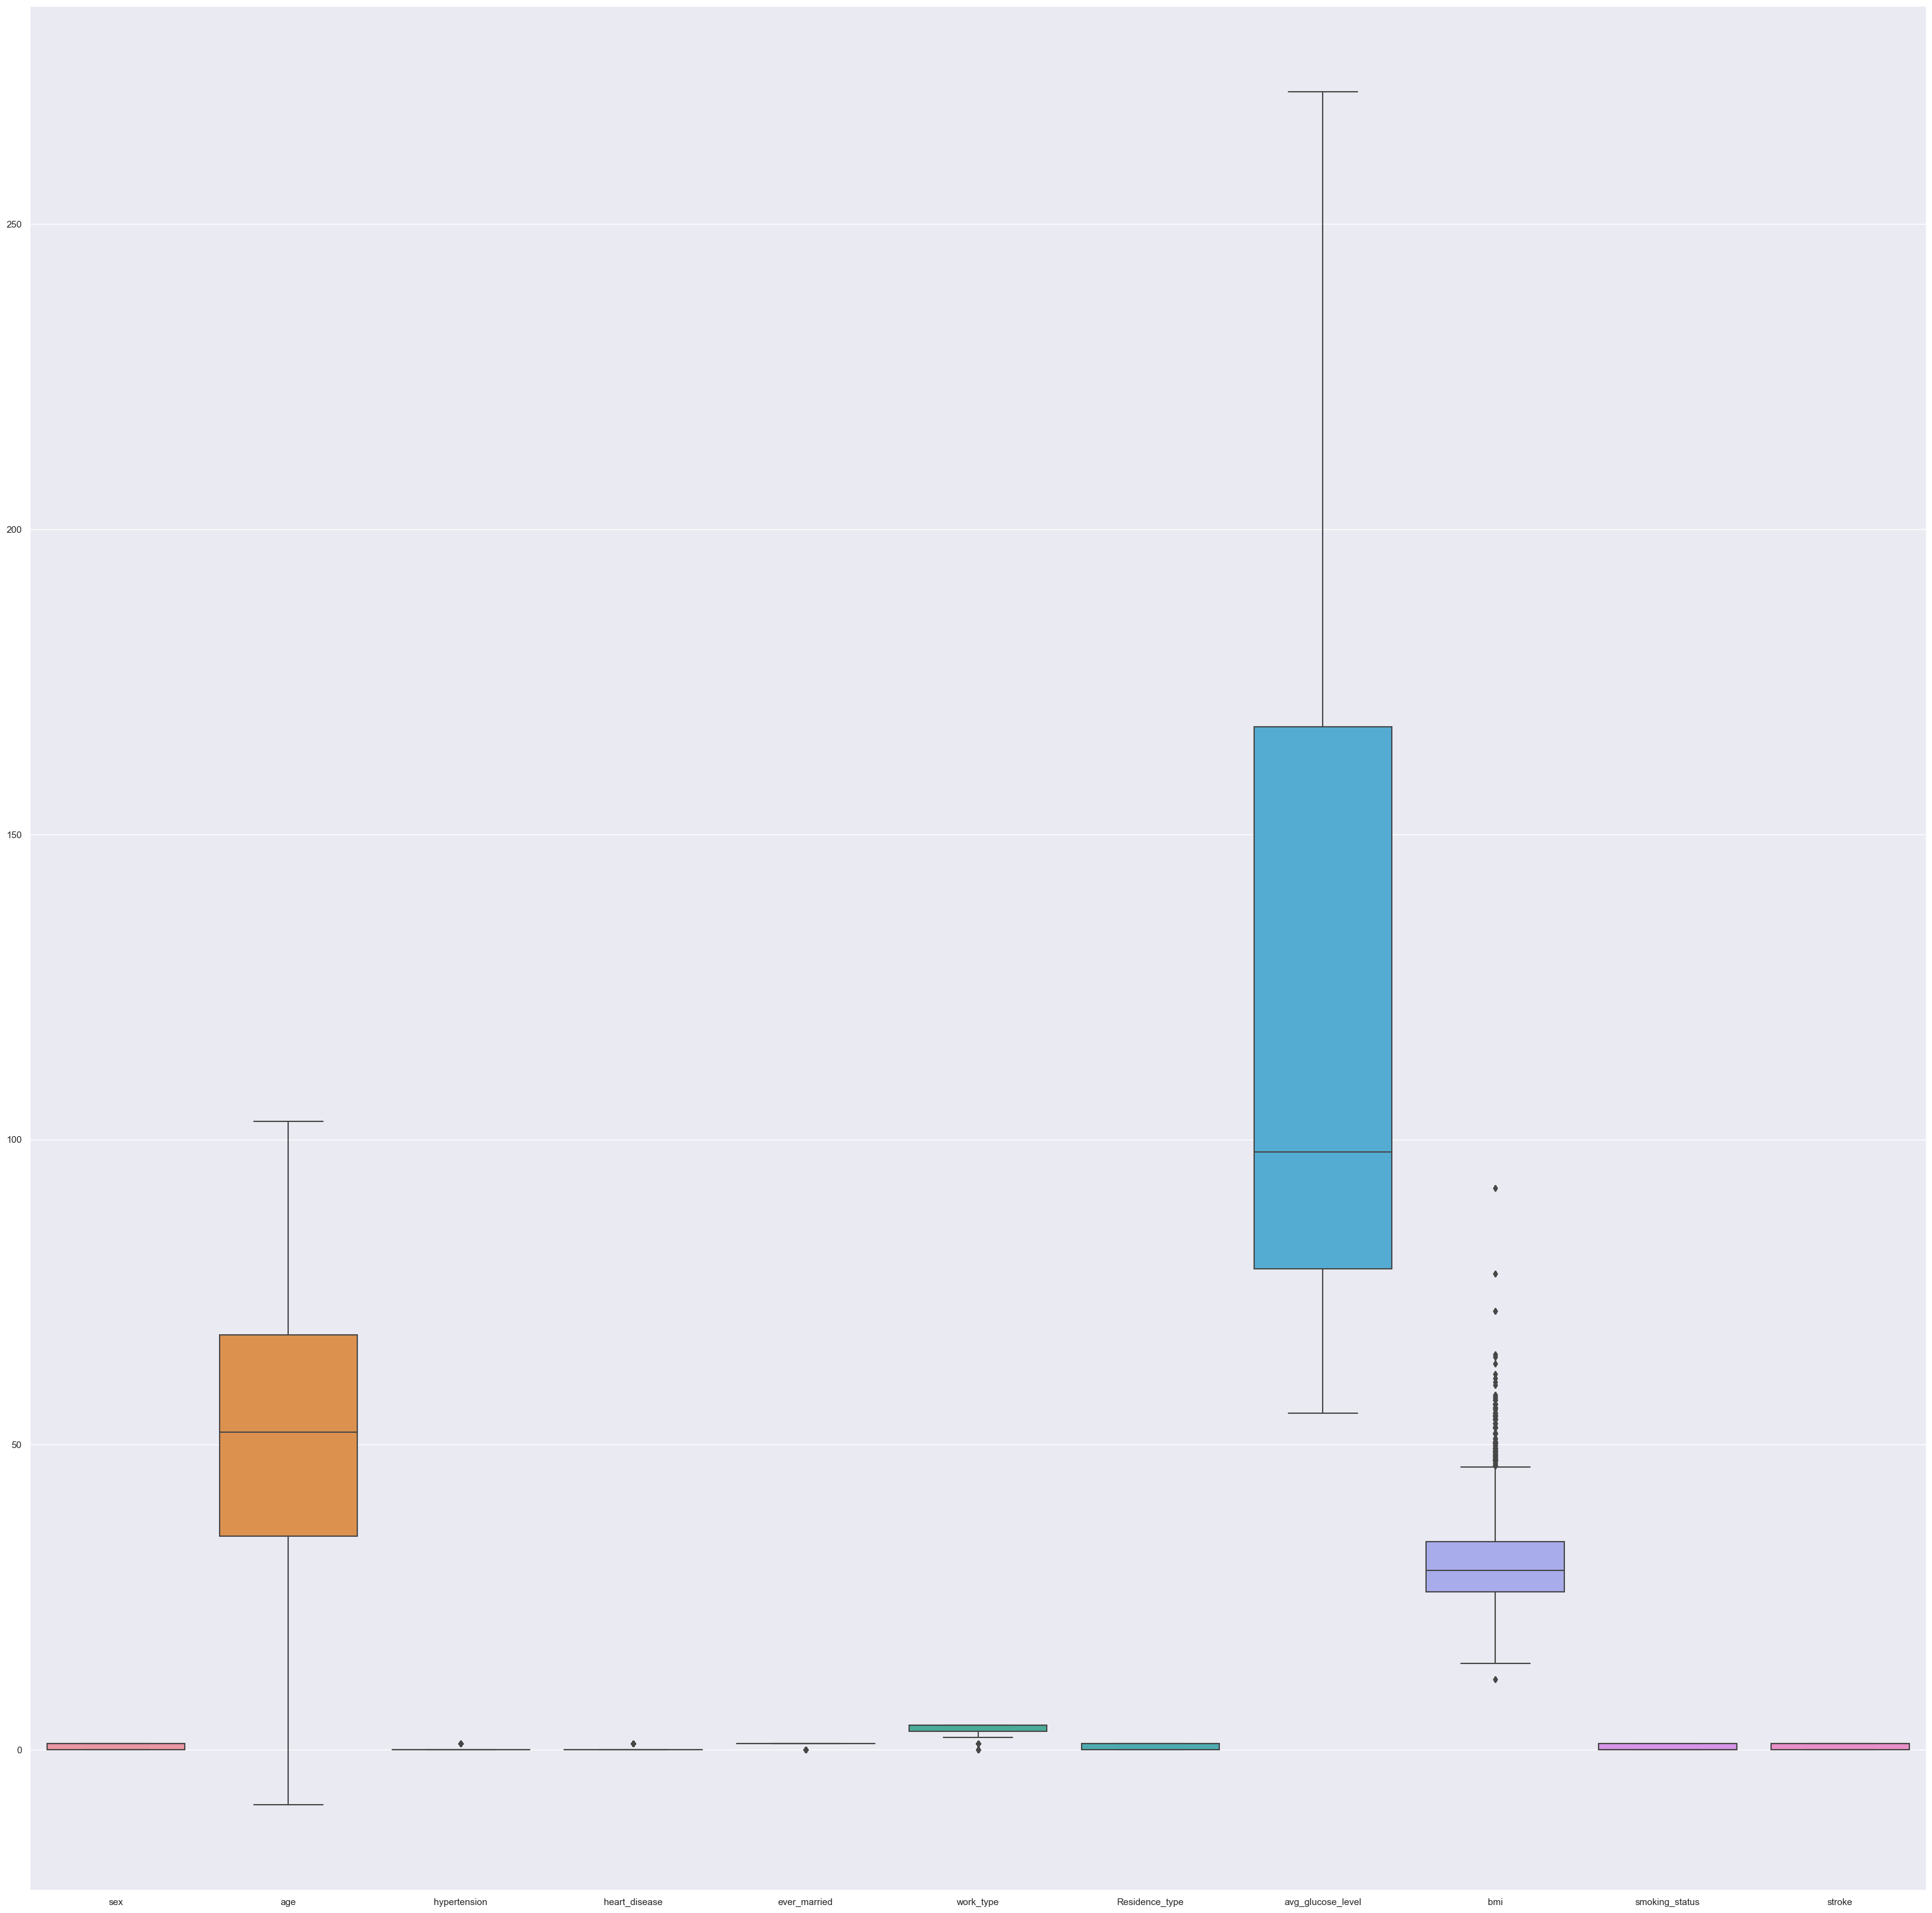

In [14]:
sns.set(rc={'figure.figsize':(40,40)})
sns.boxplot(df1)

work_type, bmi,

In [15]:
for i in range(0,len(numerical)-1):
    IQR = df1['{}'.format(numerical[i])].quantile(0.75) - df1['{}'.format(numerical[i])].quantile(0.25)
    Lower = df1['{}'.format(numerical[i])].quantile(0.25) - (IQR * 3)
    Upper = df1['{}'.format(numerical[i])].quantile(0.75) + (IQR * 3)
    print('{name} outliers are values < {lowerboundary} or > {upperboundary}'.format(name=str(numerical[i]),lowerboundary=Lower, upperboundary=Upper))

sex outliers are values < -3.0 or > 4.0
age outliers are values < -64.0 or > 167.0
hypertension outliers are values < 0.0 or > 0.0
heart_disease outliers are values < 0.0 or > 0.0
ever_married outliers are values < 1.0 or > 1.0
work_type outliers are values < 0.0 or > 7.0
Residence_type outliers are values < -3.0 or > 4.0
avg_glucose_level outliers are values < -187.76999999999998 or > 434.11
bmi outliers are values < 1.29999999999999 or > 58.70000000000001
smoking_status outliers are values < -3.0 or > 4.0


In [16]:
df1.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000
mean,0.555162,51.327303,0.213851,0.127729,0.821326,3.461095,0.514851,122.079679,30.406488,0.488572,0.500159
std,0.496954,21.624171,0.410028,0.333792,0.383083,0.780934,0.499786,57.561951,6.835305,0.499875,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [25]:
df1.shape

(40907, 11)

In [26]:
df1 = df1[df1.age>0]
df1.shape

(40826, 11)

In [27]:
df1.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40826.000000,40826.000000,40826.000000,40826.000000,40826.000000,40826.000000,40826.000000,40826.000000,40826.000000,40826.000000,40826.000000
mean,0.554891,51.433033,0.213565,0.127639,0.821266,3.460883,0.514697,122.065061,30.406021,0.488782,0.499167
std,0.496984,21.514646,0.409828,0.333692,0.383134,0.781131,0.499790,57.552075,6.835524,0.499880,0.500005
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.935000,29.400000,0.000000,0.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.410000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [29]:
def max_value(i, variable, top):
    return np.where(i[variable]>top, top, i[variable])

for i in [df1]:
    i['bmi'] = max_value(i, 'bmi', 58.70000000000001)
    

C:\Users\shara\AppData\Local\Temp\ipykernel_5324\1389668521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['bmi'] = max_value(i, 'bmi', 58.70000000000001)


In [30]:
df1.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40826.000000,40826.000000,40826.000000,40826.000000,40826.000000,40826.000000,40826.000000,40826.000000,40826.000000,40826.000000,40826.000000
mean,0.554891,51.433033,0.213565,0.127639,0.821266,3.460883,0.514697,122.065061,30.392789,0.488782,0.499167
std,0.496984,21.514646,0.409828,0.333692,0.383134,0.781131,0.499790,57.552075,6.762353,0.499880,0.500005
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.935000,29.400000,0.000000,0.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.410000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,58.700000,1.000000,1.000000


Train test split

In [35]:
df1.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [39]:
X = df1.drop('stroke',axis=1)
y = df1['stroke']

X.shape,y.shape

((40826, 10), (40826,))

In [40]:
y.value_counts()

0    20447
1    20379
Name: stroke, dtype: int64

In [41]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32660, 10), (8166, 10), (32660,), (8166,))

In [42]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [43]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=12)

# fit the model
rfc.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9988


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestClassifier(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=1,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
